In [71]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from statsmodels.tools.eval_measures import rmse
import statsmodels.api as sm
import datetime
from tueplots import bundles
from tueplots.constants.color.palettes import rgb

read_path = r'C:\Users\XeniaRieger\OneDrive - bwedu\Dokumente\Studium Master\1. Semester\Data Literacy\Data-Literacy\Data\joined_survey_article_standardized_median.csv'
df = pd.read_csv(read_path, delimiter=';', header=0)
df["date"] = pd.to_datetime(df["date"], format="%d.%m.%Y")
df["SPD"] = pd.to_numeric(df["SPD"], errors='coerce')
df["Union"] = pd.to_numeric(df["Union"], errors='coerce')
df["Grüne"] = pd.to_numeric(df["Grüne"], errors='coerce')
df["FDP"] = pd.to_numeric(df["FDP"], errors='coerce')
df["AfD"] = pd.to_numeric(df["AfD"], errors='coerce')
df["Linke"] = pd.to_numeric(df["Linke"], errors='coerce')

In [69]:
# filter data: get highest article values, long time before, short time after
dates_max = df.sort_values('standardized_war_articles').nlargest(10, 'standardized_war_articles')
df_res = pd.DataFrame(columns=["R2 Reg", "MSE Reg", "MSE Pred", "Mean diff"])
for date in dates_max['date']:
    print(date)
    time_after = 8*7 # three weeks
    time_before = 8*7
    date_after = date + datetime.timedelta(days=time_after)
    date_before = date - datetime.timedelta(days=time_before)
    total_df = df[(df["date"] <= date_after) & (df["date"] >= date_before)]
    regression_df = total_df[total_df["date"] <= date]
    pred_df = total_df[total_df["date"] >= date]
    for party in ["Union", "SPD", "Grüne", "FDP", "AfD", "Linke"]:
        regression_df = regression_df[(~regression_df[party].isna())]
        pred_df = pred_df[(~pred_df[party].isna())]
        if regression_df.empty or pred_df.empty:
            continue
        X = regression_df.index.values
        Y = regression_df[party]
        # fit model
        model = sm.OLS(Y, X).fit()
        r2_reg = model.rsquared
        df_res.loc[party, "R2 Reg"] = round(r2_reg, 3)
        #print(model.summary())
        # get values for regression
        y_reg = model.predict(X)
        mse_reg = rmse(Y, y_reg)
        df_res.loc[party, "MSE Reg"] = round(mse_reg, 2)
        # get values for prediction
        X_pred = pred_df.index.values
        Y_pred = pred_df[party]
        y_pred = model.predict(X_pred)
        mse_pred = rmse(Y_pred, y_pred)
        df_res.loc[party, "MSE Pred"] = round(mse_pred, 2)
        # calculate difference
        real_values = pred_df[party]
        diff = real_values - y_pred
        mean_diff = np.mean(diff)
        df_res.loc[party, "Mean diff"] = round(mean_diff, 2)
    print(df_res)

2003-03-28 00:00:00
      R2 Reg MSE Reg MSE Pred Mean diff
Union    1.0    1.07     1.45     -0.94
SPD    0.998    1.39     1.82      1.25
Grüne  0.996    0.67     0.68     -0.19
FDP    0.991    0.55     1.26      0.63
2022-03-18 00:00:00
      R2 Reg MSE Reg MSE Pred Mean diff
Union  0.996    1.53      2.6      2.38
SPD    0.996    1.62      1.9      1.84
Grüne  0.996    0.98     4.13      3.88
FDP    0.999    0.27      0.4      0.05
AfD      1.0    0.25     0.59      0.45
Linke  0.996    0.31     0.68     -0.57
2003-04-04 00:00:00
      R2 Reg MSE Reg MSE Pred Mean diff
Union  0.999    1.33     1.28     -0.73
SPD    0.997    1.59     1.63      1.04
Grüne  0.998    0.55     0.73      -0.3
FDP    0.995     0.4     1.36      0.96
AfD      1.0    0.25     0.59      0.45
Linke  0.996    0.31     0.68     -0.57
2022-04-07 00:00:00
      R2 Reg MSE Reg MSE Pred Mean diff
Union    1.0    0.44     2.79      2.38
SPD    0.999    0.82     0.84      0.53
Grüne  0.987    1.91      4.2      3.88


findfont: Generic family 'serif' not found because none of the following families were found: Times
findfont: Generic family 'serif' not found because none of the following families were found: Times
findfont: Generic family 'serif' not found because none of the following families were found: Times
findfont: Generic family 'serif' not found because none of the following families were found: Times
findfont: Generic family 'serif' not found because none of the following families were found: Times
findfont: Generic family 'serif' not found because none of the following families were found: Times
findfont: Generic family 'serif' not found because none of the following families were found: Times
findfont: Generic family 'serif' not found because none of the following families were found: Times
findfont: Generic family 'serif' not found because none of the following families were found: Times
findfont: Generic family 'serif' not found because none of the following families were found: Times


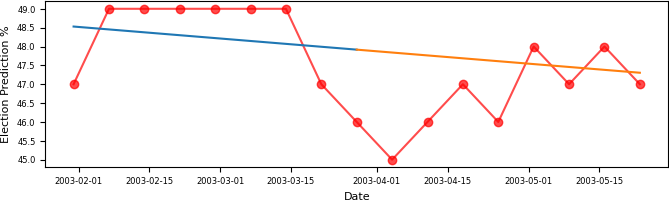

findfont: Generic family 'serif' not found because none of the following families were found: Times
findfont: Generic family 'serif' not found because none of the following families were found: Times
findfont: Generic family 'serif' not found because none of the following families were found: Times
findfont: Generic family 'serif' not found because none of the following families were found: Times
findfont: Generic family 'serif' not found because none of the following families were found: Times
findfont: Generic family 'serif' not found because none of the following families were found: Times
findfont: Generic family 'serif' not found because none of the following families were found: Times
findfont: Generic family 'serif' not found because none of the following families were found: Times
findfont: Generic family 'serif' not found because none of the following families were found: Times
findfont: Generic family 'serif' not found because none of the following families were found: Times


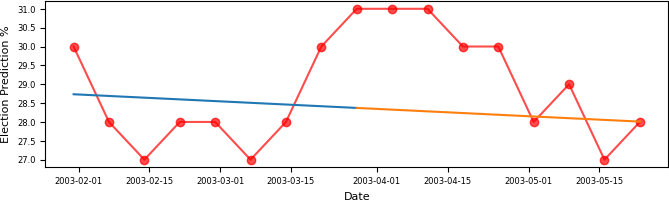

findfont: Generic family 'serif' not found because none of the following families were found: Times
findfont: Generic family 'serif' not found because none of the following families were found: Times
findfont: Generic family 'serif' not found because none of the following families were found: Times
findfont: Generic family 'serif' not found because none of the following families were found: Times
findfont: Generic family 'serif' not found because none of the following families were found: Times
findfont: Generic family 'serif' not found because none of the following families were found: Times
findfont: Generic family 'serif' not found because none of the following families were found: Times
findfont: Generic family 'serif' not found because none of the following families were found: Times
findfont: Generic family 'serif' not found because none of the following families were found: Times
findfont: Generic family 'serif' not found because none of the following families were found: Times


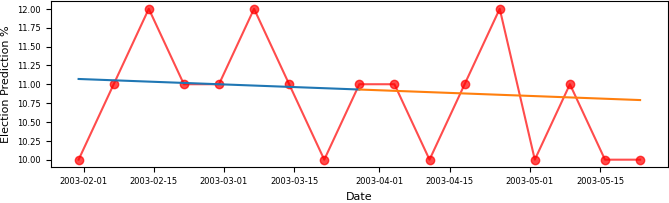

findfont: Generic family 'serif' not found because none of the following families were found: Times
findfont: Generic family 'serif' not found because none of the following families were found: Times
findfont: Generic family 'serif' not found because none of the following families were found: Times
findfont: Generic family 'serif' not found because none of the following families were found: Times
findfont: Generic family 'serif' not found because none of the following families were found: Times
findfont: Generic family 'serif' not found because none of the following families were found: Times
findfont: Generic family 'serif' not found because none of the following families were found: Times
findfont: Generic family 'serif' not found because none of the following families were found: Times
findfont: Generic family 'serif' not found because none of the following families were found: Times
findfont: Generic family 'serif' not found because none of the following families were found: Times


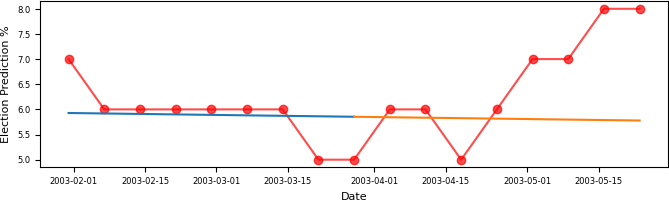

In [81]:
# filter data: get highest article values, long time before, short time after
date = df.sort_values('standardized_war_articles').nlargest(10, 'standardized_war_articles').iloc[0]['date'] #change
df_res = pd.DataFrame(columns=["R2 Reg", "MSE Reg", "MSE Pred", "Mean diff"])
time_after = 8*7 # three weeks
time_before = 8*7
date_after = date + datetime.timedelta(days=time_after)
date_before = date - datetime.timedelta(days=time_before)
total_df = df[(df["date"] <= date_after) & (df["date"] >= date_before)]
regression_df = total_df[total_df["date"] <= date]
pred_df = total_df[total_df["date"] >= date]
for party in ["Union", "SPD", "Grüne", "FDP", "AfD", "Linke"]:
    regression_df = regression_df[(~regression_df[party].isna())]
    pred_df = pred_df[(~pred_df[party].isna())]
    if regression_df.empty or pred_df.empty:
        continue
    X = regression_df.index.values
    Y = regression_df[party]
    # fit model
    model = sm.OLS(Y, X).fit()
    r2_reg = model.rsquared
    df_res.loc[party, "R2 Reg"] = round(r2_reg, 3)
    #print(model.summary())
    # get values for regression
    y_reg = model.predict(X)
    mse_reg = rmse(Y, y_reg)
    df_res.loc[party, "MSE Reg"] = round(mse_reg, 2)
    # get values for prediction
    X_pred = pred_df.index.values
    Y_pred = pred_df[party]
    y_pred = model.predict(X_pred)
    mse_pred = rmse(Y_pred, y_pred)
    df_res.loc[party, "MSE Pred"] = round(mse_pred, 2)
    # calculate difference
    real_values = pred_df[party]
    diff = real_values - y_pred
    mean_diff = np.mean(diff)
    df_res.loc[party, "Mean diff"] = round(mean_diff, 2)
    plt.rcParams.update(bundles.icml2022(column='full', nrows=1, ncols=2, usetex=False))
    fig, ax1 = plt.subplots()
    ax1.set_xlabel('Date')
    ax1.set_ylabel('Election Prediction %')
    ax1.plot(total_df['date'], total_df[party], marker='o', linestyle='-', color='red', alpha=0.7)
    ax1.plot(regression_df['date'], y_reg)
    ax1.plot(pred_df['date'], y_pred)